In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv("/content/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [118]:
df.shape

(30000, 25)

In [119]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

## Data Card

In [120]:
"""
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)
"""

'\nID: ID of each client\nLIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)\nSEX: Gender (1=male, 2=female)\nEDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)\nMARRIAGE: Marital status (1=married, 2=single, 3=others)\nAGE: Age in years\nPAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)\nPAY_2: Repayment status in August, 2005 (scale same as above)\nPAY_3: Repayment status in July, 2005 (scale same as above)\nPAY_4: Repayment status in June, 2005 (scale same as above)\nPAY_5: Repayment status in May, 2005 (scale same as above)\nPAY_6: Repayment status in April, 2005 (scale same as above)\nBILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)\nBILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)\nBILL_AMT3: Amount of bill sta

## Exploratory Data Analysis

In [121]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [122]:
# Data set contains no null values
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [124]:
# Number of unique member
df["ID"].nunique()

30000

In [125]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


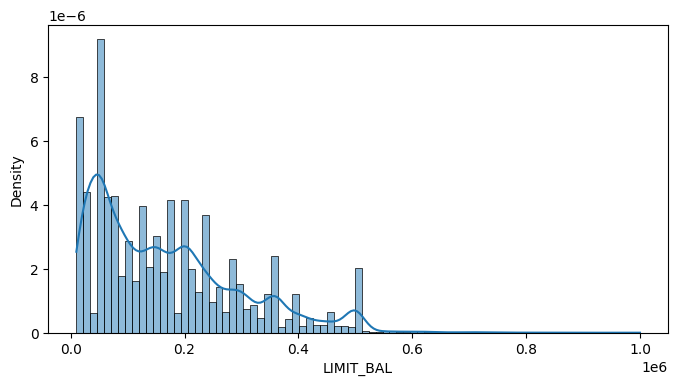


1. KDE Plot shows right skewness, meaning most of the client have a lower credit limit.
2. Most of the clients borrow below 200K.
3. There are few clients who borrow above 500K, can be potential outliers.
4. Log transformation can be used to transform the data to reduce the influence of the extreme values for better model performance. 



In [126]:
plt.figure(figsize= (8, 4))

sns.histplot(df["LIMIT_BAL"], kde= True, stat= "density")

plt.show()

print("""
1. KDE Plot shows right skewness, meaning most of the client have a lower credit limit.
2. Most of the clients borrow below 200K.
3. There are few clients who borrow above 500K, can be potential outliers.
4. Log transformation can be used to transform the data to reduce the influence of the extreme values for better model performance.
""")

In [127]:
print("The average credit limit is: ", round(df["LIMIT_BAL"].mean(), 2))
print("The standard deviation of credit limit is: ", round(df["LIMIT_BAL"].std(), 2))

The average credit limit is:  167484.32
The standard deviation of credit limit is:  129747.66


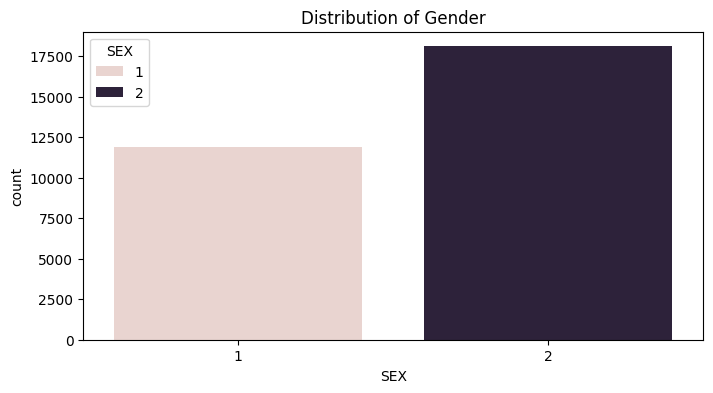

Females are the major proportion the clients.


In [128]:
plt.figure(figsize= (8, 4))

sns.countplot(x='SEX', data=df, hue= "SEX")

plt.title('Distribution of Gender')
plt.show()

print("Females are the major proportion the clients.")

In [129]:
gender_counts = df['SEX'].value_counts()

print(gender_counts)

print("""
There are total 11888 (1) males and 18112 (2) females.
""")

SEX
2    18112
1    11888
Name: count, dtype: int64

There are total 11888 (1) males and 18112 (2) females.



In [130]:
gender_default_status = df.groupby(["default.payment.next.month", "SEX"])["SEX"].value_counts()

print(gender_default_status)

print("""
1. The proportion female is more as compared to male when it comes to timely payment.
2. The proportion female is more as compared to male when it comes to defaulting their payment.
""")

default.payment.next.month  SEX
0                           1       9015
                            2      14349
1                           1       2873
                            2       3763
Name: count, dtype: int64

1. The proportion female is more as compared to male when it comes to timely payment.
2. The proportion female is more as compared to male when it comes to defaulting their payment.



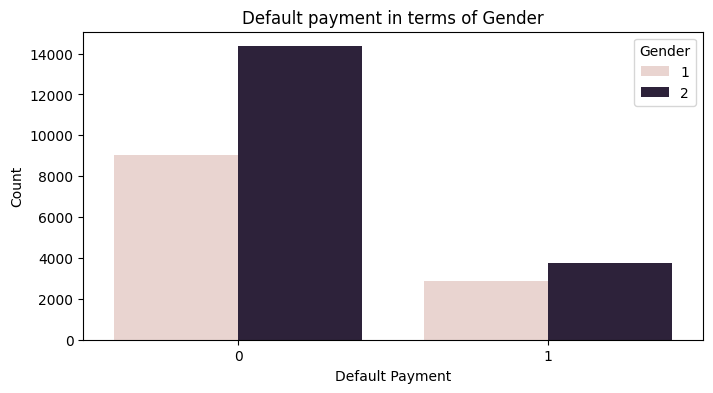

In [131]:
plt.figure(figsize= (8, 4))

sns.countplot(x='default.payment.next.month', hue='SEX', data=df,)

plt.title('Default payment in terms of Gender')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.legend(title='Gender')

plt.show()

In [132]:
df["EDUCATION"] = df["EDUCATION"].replace([0, 4, 5, 6], 4)

In [133]:
edu_cnt = df['EDUCATION'].value_counts()

print(edu_cnt)

print("""
1. Most of the clients are in university.
""")

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

1. Most of the clients are in university.



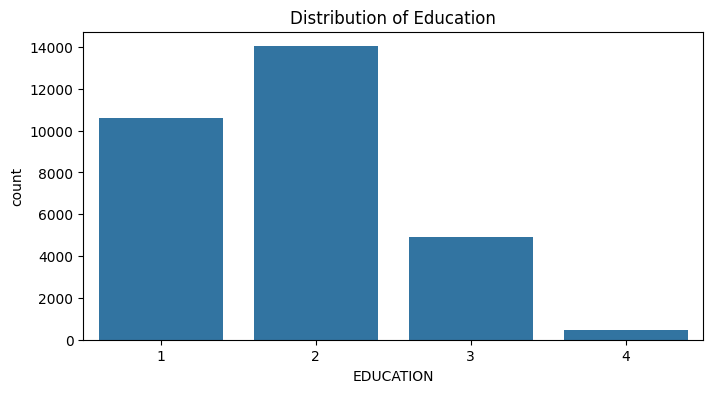

In [134]:
plt.figure(figsize= (8, 4))

sns.countplot(x='EDUCATION', data=df)

plt.title('Distribution of Education')
plt.show()

In [135]:
grouped_counts = df.groupby(['default.payment.next.month','EDUCATION'])['EDUCATION'].count()
print(grouped_counts)

default.payment.next.month  EDUCATION
0                           1             8549
                            2            10700
                            3             3680
                            4              435
1                           1             2036
                            2             3330
                            3             1237
                            4               33
Name: EDUCATION, dtype: int64


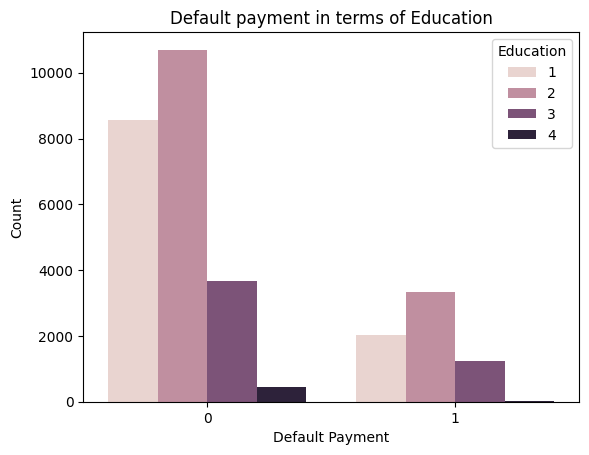

In [136]:
sns.countplot(x='default.payment.next.month', hue='EDUCATION', data=df)

plt.title('Default payment in terms of Education')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.legend(title='Education')

plt.show()

In [137]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


In [138]:
df['MARRIAGE'] = df['MARRIAGE'].replace(to_replace=[0], value=3)
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,377


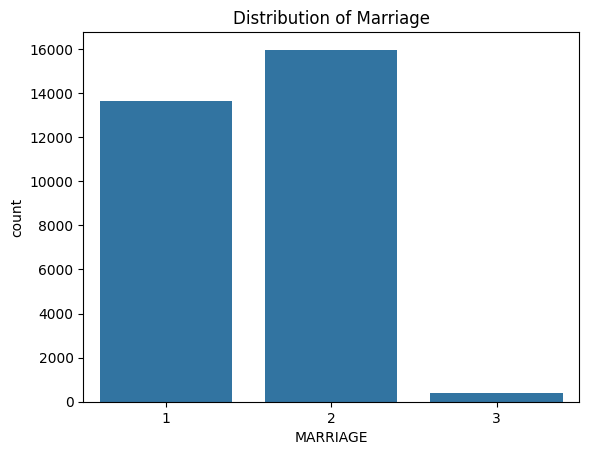

In [139]:
sns.countplot(x='MARRIAGE', data=df)

plt.title('Distribution of Marriage')
plt.show()

In [140]:
grouped_counts = df.groupby(['default.payment.next.month','MARRIAGE'])['MARRIAGE'].count()
print(grouped_counts)

default.payment.next.month  MARRIAGE
0                           1           10453
                            2           12623
                            3             288
1                           1            3206
                            2            3341
                            3              89
Name: MARRIAGE, dtype: int64


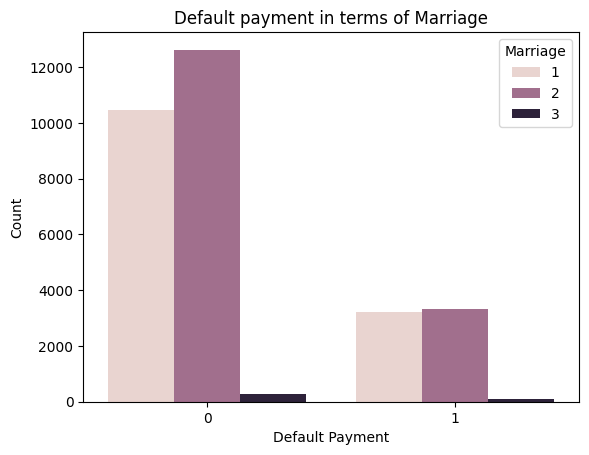

In [141]:
sns.countplot(x='default.payment.next.month', hue='MARRIAGE', data=df)

plt.title('Default payment in terms of Marriage')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.legend(title='Marriage')

plt.show()

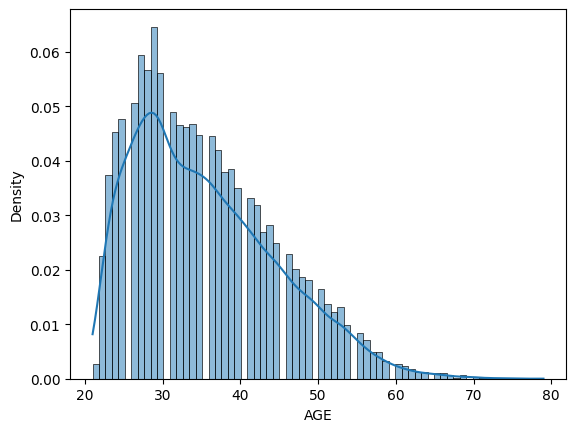

In [142]:
sns.histplot(df['AGE'], kde=True, stat="density")
plt.show()

In [143]:
df_repayment = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
df_repayment_status = df_repayment.apply(pd.Series.value_counts)
df_repayment_status

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,2759,3782,4085,4348,4546.0,4895.0
-1,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3688,28,4,2,NaN,NaN
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0


In [144]:
df_repayment_status = df_repayment_status.reset_index().rename(columns={'index': 'Repayment_Status'})
df_repayment_status = df_repayment_status.rename(columns={'PAY_0': '9','PAY_2': '8','PAY_3': '7','PAY_4': '6','PAY_5': '5','PAY_6': '4'})
df_repayment_status

,Repayment_Status,9,8,7,6,5,4
0,-2,2759,3782,4085,4348,4546.0,4895.0
1,-1,5686,6050,5938,5687,5539.0,5740.0
2,0,14737,15730,15764,16455,16947.0,16286.0
3,1,3688,28,4,2,NaN,NaN
4,2,2667,3927,3819,3159,2626.0,2766.0
5,3,322,326,240,180,178.0,184.0
6,4,76,99,76,69,84.0,49.0
7,5,26,25,21,35,17.0,13.0
8,6,11,12,23,5,4.0,19.0
9,7,9,20,27,58,58.0,46.0


In [145]:
df_melted = df_repayment_status.melt(id_vars=["Repayment_Status"], var_name="Month", value_name="Count")
df_melted

,Repayment_Status,Month,Count
0,-2,9,2759.0
1,-1,9,5686.0
2,0,9,14737.0
3,1,9,3688.0
4,2,9,2667.0
...,...,...,...
61,4,4,49.0
62,5,4,13.0
63,6,4,19.0
64,7,4,46.0


In [146]:
df_melted["Month"] = df_melted["Month"].astype(int)

df_melted = df_melted.sort_values(by=["Month", "Repayment_Status"])

df_melted['Month'] = df_melted['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
df_melted

,Repayment_Status,Month,Count
55,-2,April,4895.0
56,-1,April,5740.0
57,0,April,16286.0
58,1,April,NaN
59,2,April,2766.0
...,...,...,...
6,4,September,76.0
7,5,September,26.0
8,6,September,11.0
9,7,September,9.0


In [147]:
early_ontime = df_melted[df_melted['Repayment_Status'] <= 0]
late = df_melted[df_melted['Repayment_Status'] > 0]

In [148]:
late123 = late[late['Repayment_Status'] < 4]
late456 = late[late['Repayment_Status'] > 3]

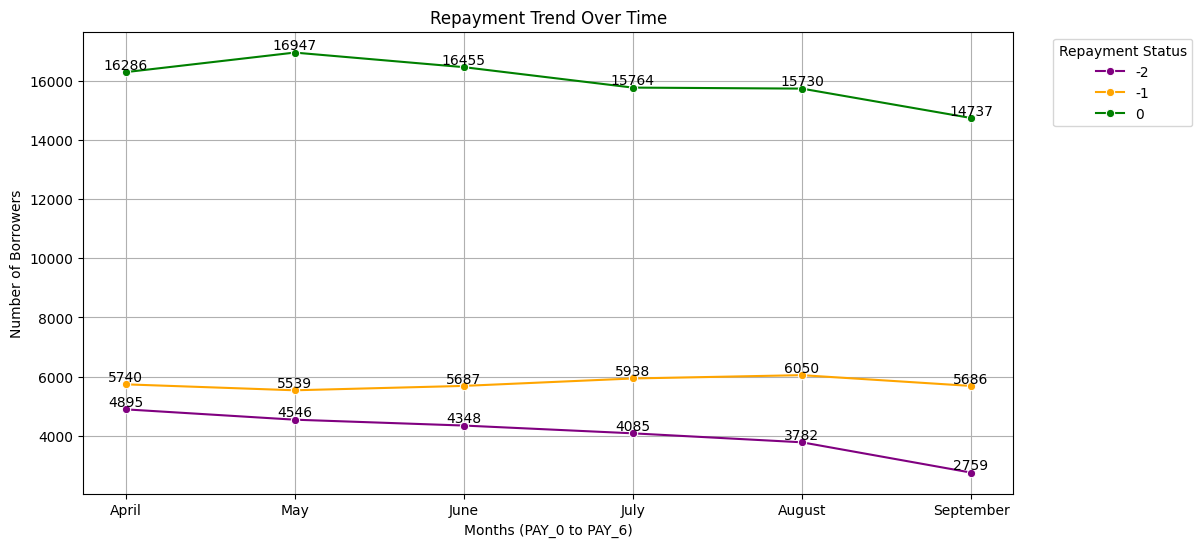

In [149]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=early_ontime, x="Month", y="Count", hue="Repayment_Status", marker="o", palette=['purple', 'orange', 'green'])

for line in ax.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f"{int(y)}", fontsize=10, ha="center", va="bottom")

plt.title("Repayment Trend Over Time")
plt.xlabel("Months (PAY_0 to PAY_6)")
plt.ylabel("Number of Borrowers")
plt.legend(title="Repayment Status", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(True)

plt.show()

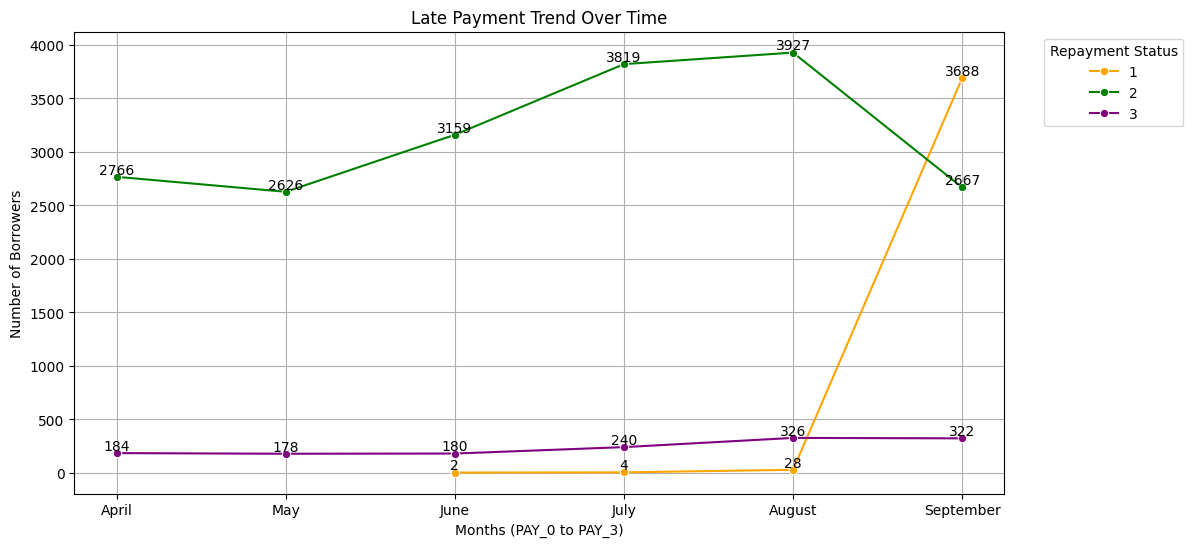

In [150]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=late123, x="Month", y="Count", hue="Repayment_Status", marker="o", palette=['orange', 'green', 'purple'])

for line in ax.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f"{int(y)}", fontsize=10, ha="center", va="bottom")

plt.title("Late Payment Trend Over Time")
plt.xlabel("Months (PAY_0 to PAY_3)")
plt.ylabel("Number of Borrowers")
plt.legend(title="Repayment Status", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(True)

plt.show()

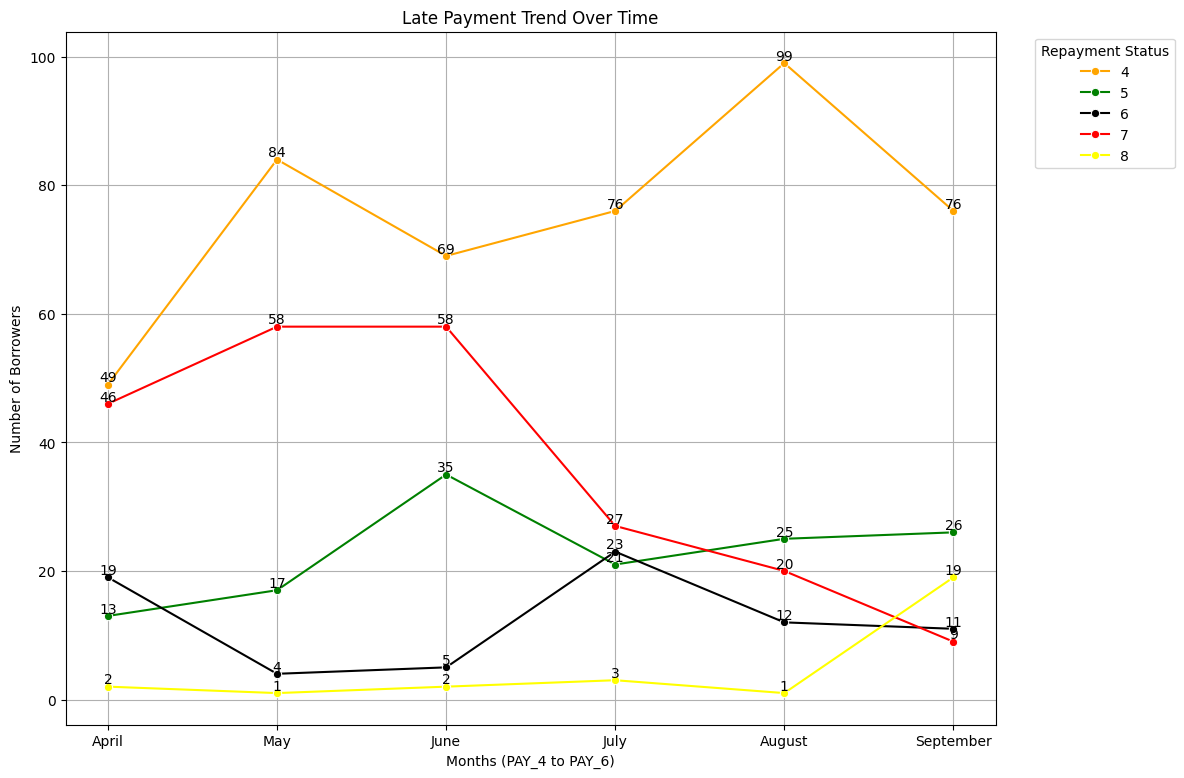

In [151]:
plt.figure(figsize=(12, 9))
ax = sns.lineplot(data=late456, x="Month", y="Count", hue="Repayment_Status", marker="o", palette=['orange', 'green', 'black', 'red', 'yellow'])

for line in ax.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f"{int(y)}", fontsize=10, ha="center", va="bottom")

plt.title("Late Payment Trend Over Time")
plt.xlabel("Months (PAY_4 to PAY_6)")
plt.ylabel("Number of Borrowers")
plt.legend(title="Repayment Status", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(True)

plt.show()

## Feature Selection


In [152]:
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Handling Multicollinearirty

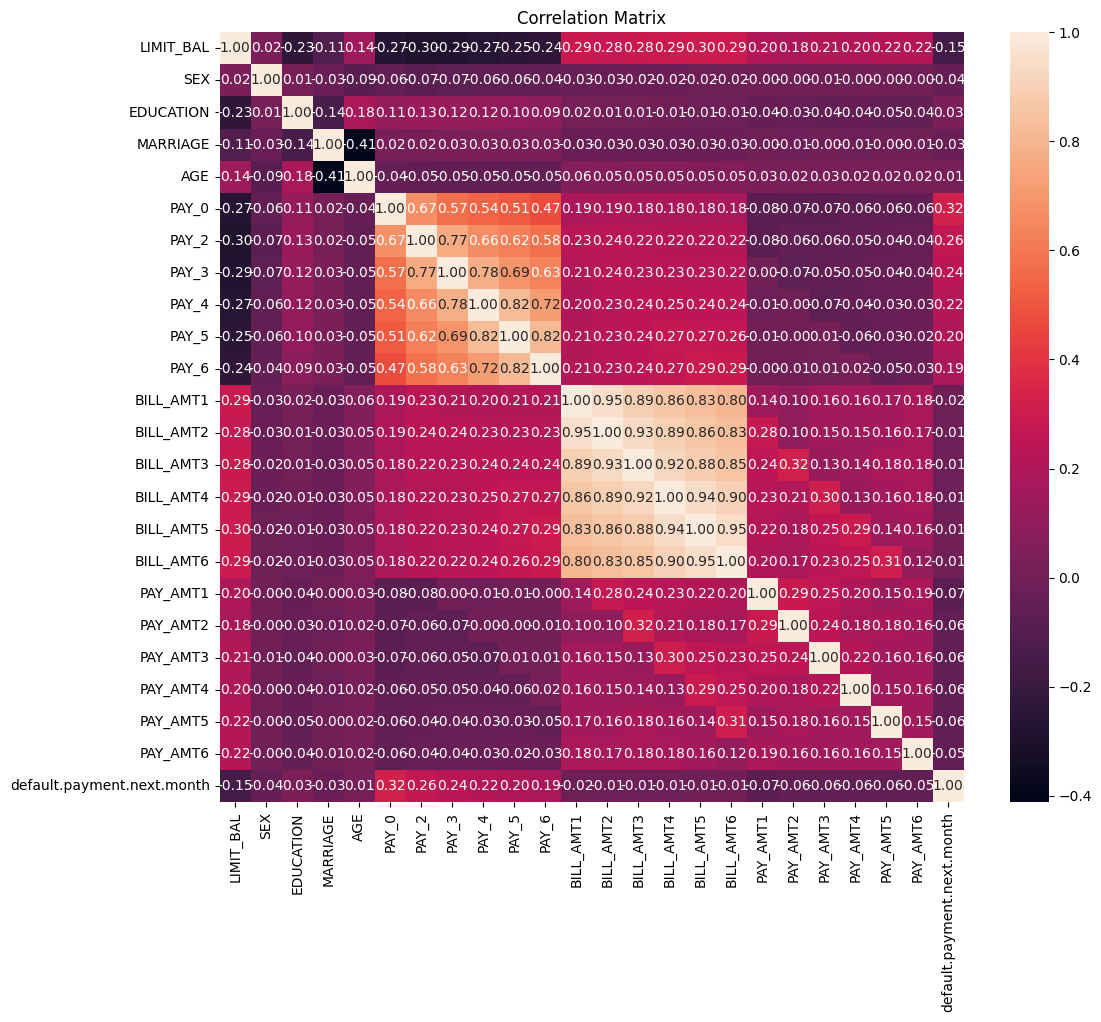

In [153]:
corr_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

## Handling Missing Values

In [154]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [155]:
df = df.dropna()

In [156]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


## Feature Importance Technique

In [157]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

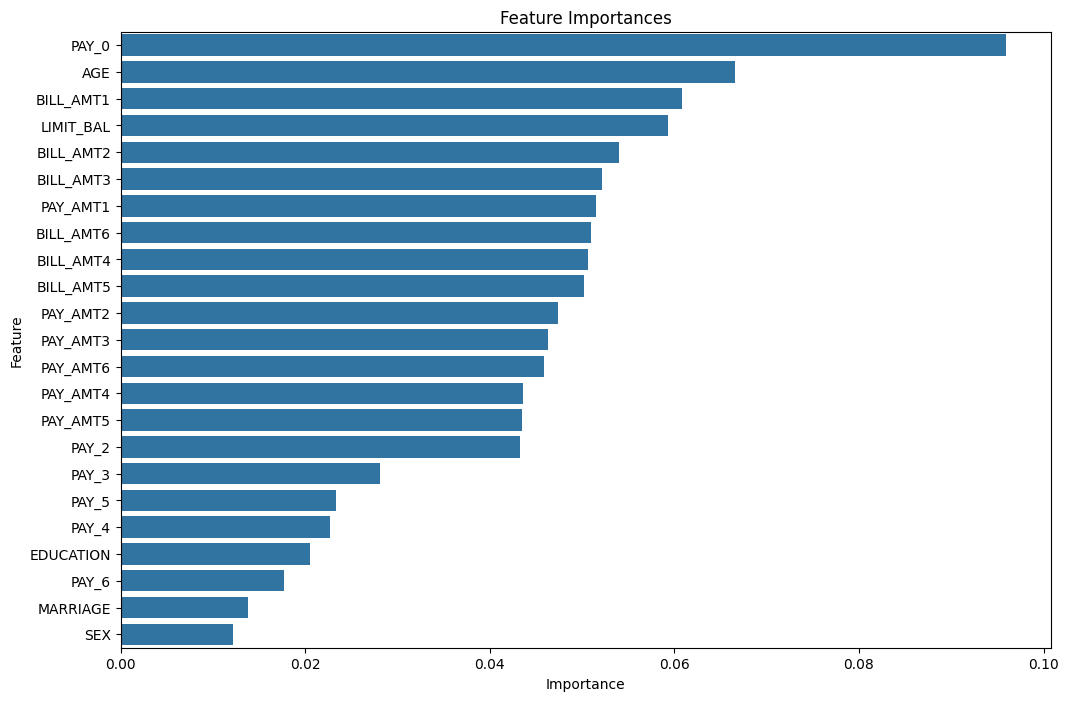

In [158]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X, y)

importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importances")
plt.show()

## Feature Engineering

In [159]:
df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['EDUCATION'] = df['EDUCATION'].map({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others', 5: 'Unknown', 6: 'Unknown'})
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Others'})

df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

In [160]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_Male,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,1,False,False,False,True,False,False
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,1000.0,0.0,2000.0,1,False,False,False,True,False,True
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,5000.0,0,False,False,False,True,False,True
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1100.0,1069.0,1000.0,0,False,False,False,True,False,False
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,9000.0,689.0,679.0,0,True,False,False,True,False,False


## Payment Behaviour Feature

In [161]:
pay_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['Total_Delayed_Payments'] = df[pay_features].apply(lambda x: sum(x > 0), axis=1)
df['Max_Delay'] = df[pay_features].max(axis=1)
df['Avg_Delay'] = df[pay_features].mean(axis=1)
df['Ever_Defaulted'] = df[pay_features].apply(lambda x: any(x > 0), axis=1)

In [162]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_Male,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single,Total_Delayed_Payments,Max_Delay,Avg_Delay,Ever_Defaulted
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,False,False,False,True,False,False,2,2,-0.333333,True
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,False,False,False,True,False,True,2,2,0.500000,True
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,False,False,False,True,False,True,0,0,0.000000,False
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,False,False,False,True,False,False,0,0,0.000000,False
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,True,False,False,True,False,False,0,0,-0.333333,False


## Bill & Payment Summary Statistics

In [163]:
bill_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_features = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df['Total_Bill_Amount'] = df[bill_features].sum(axis=1)
df['Total_Payment_Amount'] = df[pay_amt_features].sum(axis=1)
df['Payment_to_Bill_Ratio'] = df['Total_Payment_Amount'] / df['Total_Bill_Amount'].replace(0, np.nan)
df['Avg_Bill_Amount'] = df[bill_features].mean(axis=1)
df['Avg_Payment_Amount'] = df[pay_amt_features].mean(axis=1)

df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,MARRIAGE_Single,Total_Delayed_Payments,Max_Delay,Avg_Delay,Ever_Defaulted,Total_Bill_Amount,Total_Payment_Amount,Payment_to_Bill_Ratio,Avg_Bill_Amount,Avg_Payment_Amount
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,False,2,2,-0.333333,True,7704.0,689.0,0.089434,1284.000000,114.833333
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,True,2,2,0.500000,True,17077.0,5000.0,0.292791,2846.166667,833.333333
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,True,0,0,0.000000,False,101653.0,11018.0,0.108388,16942.166667,1836.333333
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,False,0,0,0.000000,False,231334.0,8388.0,0.036259,38555.666667,1398.000000
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,False,0,0,-0.333333,False,109339.0,59049.0,0.540054,18223.166667,9841.500000


## Limit Usage Feature

In [164]:
df['Avg_Utilization'] = df[bill_features].mean(axis=1) / df['LIMIT_BAL']
df['Payment_Behavior_vs_Limit'] = df['Total_Payment_Amount'] / df['LIMIT_BAL']

df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,Max_Delay,Avg_Delay,Ever_Defaulted,Total_Bill_Amount,Total_Payment_Amount,Payment_to_Bill_Ratio,Avg_Bill_Amount,Avg_Payment_Amount,Avg_Utilization,Payment_Behavior_vs_Limit
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,2,-0.333333,True,7704.0,689.0,0.089434,1284.000000,114.833333,0.064200,0.034450
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,2,0.500000,True,17077.0,5000.0,0.292791,2846.166667,833.333333,0.023718,0.041667
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,0,0.000000,False,101653.0,11018.0,0.108388,16942.166667,1836.333333,0.188246,0.122422
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,0,0.000000,False,231334.0,8388.0,0.036259,38555.666667,1398.000000,0.771113,0.167760
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,0,-0.333333,False,109339.0,59049.0,0.540054,18223.166667,9841.500000,0.364463,1.180980


## ML Model

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

df = df.dropna()

X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

lr = LogisticRegression(max_iter=1500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4562
           1       0.61      0.26      0.37      1264

    accuracy                           0.80      5826
   macro avg       0.72      0.61      0.63      5826
weighted avg       0.78      0.80      0.77      5826

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4562
           1       0.39      0.42      0.40      1264

    accuracy                           0.73      5826
   macro avg       0.61      0.62      0.61      5826
weighted avg       0.74      0.73      0.73      5826

